In [1]:
import nepc
import plotter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
cnx, cursor = nepc.connect(local=True)

In [3]:
models = nepc.table_as_df(cursor, "models")
models

,0,1,2
0,1,angus,cross sections used by J. Angus
1,2,pcm_n_1,plasma chemistry model - nitrogen - 1


In [4]:
angus = nepc.model(cursor, "angus")

In [5]:
nepc.model_summary_df(angus)

,0,1
0,excitation,N2
1,excitation,N2
2,excitation,N2
3,excitation,N2
4,excitation,N2
5,excitation,N2
6,excitation,N2
7,excitation,N2
8,excitation,N2
9,dissociation_total,N2


In [6]:
len(angus)

367

In [7]:
for cs in angus:
    print(cs["process"])

excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
dissociation_total
dissociation
d_ionization_total
dissociation
d_ionization
dissociation
d_ionization
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excitation
excita

In [8]:
processes = nepc.table_as_df(cursor, "processes")
processes

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,elastic,Elastic electron scattering,1,1,1,1,0,0,0,0,0,0
1,2,excitation,"""Excitation of atoms (electronic), inelastic e...",1,1,1,1,0,0,0,0,0,0
2,3,excitation_v,"""Excitation of atoms (electronic + vibrational...",1,1,1,1,0,0,1,1,0,0
3,4,excitation_j,"""Excitation of atoms (electronic + rotational)...",1,1,1,1,0,0,0,0,1,1
4,5,excitation_vj,"""Excitation of atoms (electronic + vibrational...",1,1,1,1,0,0,1,1,1,1
5,6,s_deexcitation,Spontaneous de-excitation,1,1,0,0,0,1,0,0,0,0
6,7,s_deexcitation_v,Spontaneous de-excitation (vibrational),1,1,0,0,0,1,1,1,0,0
7,8,s_deexcitation_j,Spontaneous de-excitation (rotational),1,1,0,0,0,1,0,0,1,1
8,9,s_deexcitation_vj,Spontaneous de-excitation (vibrational and rot...,1,1,0,0,0,1,1,1,1,1
9,10,c_deexcitation,Collisional induced de-excitation,1,1,1,1,0,1,0,0,0,0


In [9]:
cursor.execute("SELECT * FROM states")
states = pd.DataFrame(cursor.fetchall())

In [10]:
states

,0,1,2,3,4
0,1,1,N,N,"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \..."
1,2,1,N_2s22p3_4So,N($2s^22p^3 {}^4S^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \..."
2,3,1,N_2s22p3_2Do,N($2s^22p^3 {}^2D^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \..."
3,4,1,N_2s22p3_2Po,N($2s^22p^3 {}^2P^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \..."
4,5,1,N_2s22p2_3P_3s_4P,N($2s^22p^2$(${}^3P$)3s ${}^4P$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \..."
5,6,1,N_2s22p2_3P_3s_2P,N($2s^22p^2$(${}^3P$)3s ${}^2P$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \..."
6,7,1,N_2s22p4_4P,N($2s^22p^4$ ${}^4P$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \..."
7,8,1,N_2s22p2_3P_3p_2So,N($2s^22p^2$(${}^3P$)3p ${}^2S^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \..."
8,9,1,N_2s22p2_3P_3p_4Do,N($2s^22p^2$(${}^3P$)3p ${}^4D^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \..."
9,10,1,N_2s22p2_3P_3p_4Po,N($2s^22p^2$(${}^3P$)3p ${}^4P^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \..."


In [11]:
cursor.execute("SELECT * FROM species")
species = pd.DataFrame(cursor.fetchall())

In [12]:
species

,0,1,2
0,1,N,N
1,2,N-,N$^-$
2,3,N+,N$^+$
3,4,N2,N$_2$
4,5,N2+,N$_2^+$


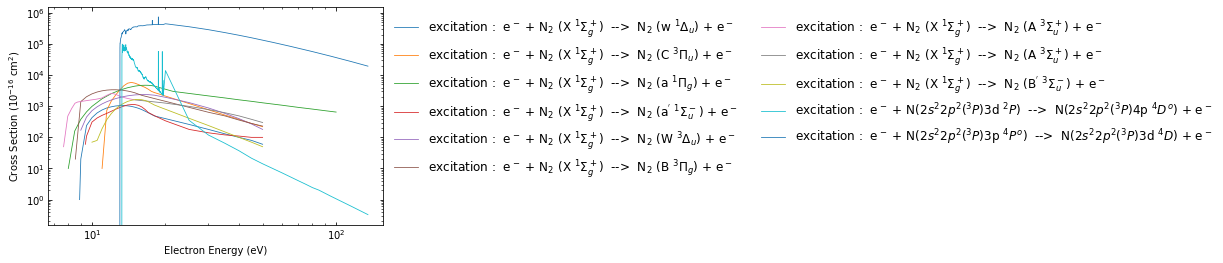

In [13]:
fig, ax = plt.subplots(1, 1)
plotter.plot_nepc_model(ax, angus, 1E-24, '10$^{-16}$ cm$^2$',
                        'excitation',
                        plot_param_dict = {'linewidth':.8}, 
                        #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
                        ylog=True, xlog=True) 

In [14]:
cnx.close()